In [250]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [251]:
with open('fm.json') as f:
    fm = json.load(f)
with open('fw.json') as f:
    fw = json.load(f)

j = []
for k, v in fm['verbs'].items():
    j.extend(v['articles'])
for k, v in fw['verbs'].items():
    j.extend(v['articles'])

with open('clean.json', 'w') as f:
    json.dump(j, f, indent=4)
    
df = pd.DataFrame().from_dict(j)

/Users/kevinmcelwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  # This is added back by InteractiveShellApp.init_path()


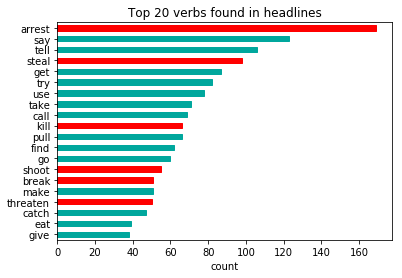

In [252]:
m = []
for i, r in df.iterrows():
    m.extend(r['verbs'])
count_m = sorted([[verb, len([x for x in m if x == verb])] for verb in set(m)], key=lambda x: -x[1])[:20]

df_verb = pd.DataFrame(index=[x[0] for x in count_m])
df_verb['count'] = [x[1] for x in count_m]
df_verb.sort_values(by="count", inplace=True)

fig, ax = plt.subplots(nrows=1, ncols=1)
df_verb['count'].plot('barh', ax=ax)
ax.set_xlabel('count')
seagreen = '#1B75BC'
smartblue = '#00A79D'
for i in range(20):
    if i in [19-x for x in [0, 3, 9, 13, 14, 16]]:
        ax.get_children()[i].set_color('r')
    else:
        ax.get_children()[i].set_color(smartblue)
ax.set_title('Top 20 verbs found in headlines')
fig.savefig('img/verb_count.png', dpi=400)

/Users/kevinmcelwee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  # Remove the CWD from sys.path while we load stuff.


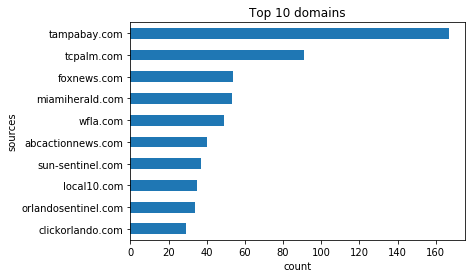

In [253]:
HOW_LARGE = 10

fig, ax = plt.subplots(nrows=1, ncols=1)
set([x['domain'] for x in j])
df_s = pd.DataFrame()
df_s['sources'] = list(set([x['domain'] for x in j]))
df_s['count'] = df_s.sources.apply(lambda x: len([a for a in j if a['domain'] == x]))
df_s.set_index('sources', inplace=True)
df_s.sort_values(by="count", inplace=True)
df_s['count'].tail(10).plot('barh', ax=ax)
ax.set_xlabel('count')
ax.set_title('Top 10 domains')
fig.savefig('img/domain_count.png',  bbox_inches='tight', dpi=400)

In [254]:
m = df.groupby('domain')['url'].count().to_dict()
d = sorted([[k, v] for k, v in m.items()], key=lambda x: -x[1])
top_sources = [x[0] for x in d[:HOW_LARGE]]
df_t = df[df['domain'].isin(top_sources)]
s = sorted(top_sources, key=lambda x: -df_t.groupby('domain')['score'].median()[x])

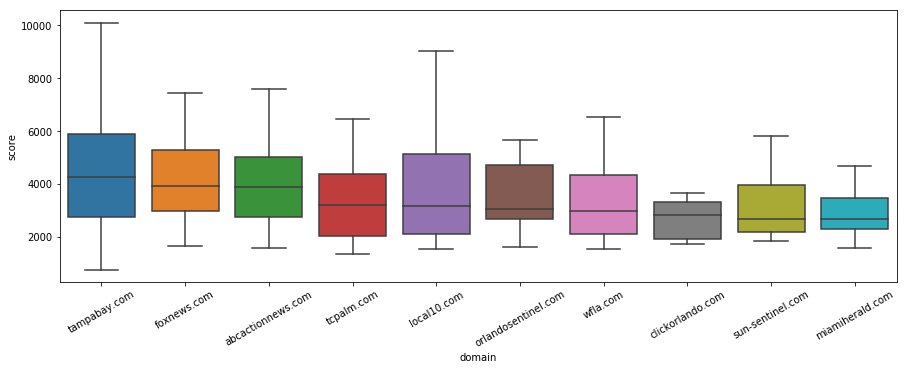

In [255]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
p1 = sns.boxplot(data=df_t, y='score', x="domain", showfliers=False, order=s, ax=ax)
p1.set_xticklabels(p1.get_xticklabels(), rotation=30)
fig.savefig('img/source_boxplot.png', dpi=400,  bbox_inches='tight')